In [1]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
import pickle

In [16]:
twt = pd.read_json("D:/NLP/Twitter Data Collection/deepseek ai.json",lines=True,orient='records')
twt = twt[['created_at','text']]

In [17]:
twt.tail()

,created_at,text
95,2025-02-18 15:50:38+00:00,He has an impressive track record and was also...
96,2025-02-18 15:50:35+00:00,RT @xDaily: THREAD: Here's a breakdown of what...
97,2025-02-18 15:50:35+00:00,"@jerryHsome ""Hey there! 👋 Drop a 'Hello' to di..."
98,2025-02-18 15:50:31+00:00,RT @R5Z5G: 🎯欢迎喜欢二级市场的朋友们一起来加入本次的分享会\n\n明天晚上9点(...
99,2025-02-18 15:50:30+00:00,"@LeadingMaths ""Hey there! 👋 Drop a 'Hello' to ..."


In [19]:
#text processing of the twitter data
twt['text'] = twt['text'].str.lstrip('0123456789')

#lower casing
twt['text'] = twt['text'].apply(lambda a: " ".join(a.lower() for a in a.split()))

#remove the punctuation
twt['text'] = twt['text'].str.replace('[^\w\s]',' ')

#remvove the stop words
sw = stopwords.words('english')
twt['text'] = twt['text'].apply(lambda a: " ".join(a for a in a.split() if a not in sw))

#spelling correction
twt['text'].apply(lambda a: str(TextBlob(a).correct()))

twt.tail()

,created_at,text
95,2025-02-18 15:50:38+00:00,impressive track record also involved early de...
96,2025-02-18 15:50:35+00:00,rt @xdaily: thread: here's breakdown got annou...
97,2025-02-18 15:50:35+00:00,"@jerryhsome ""hey there! 👋 drop 'hello' discove..."
98,2025-02-18 15:50:31+00:00,rt @r5z5g: 🎯欢迎喜欢二级市场的朋友们一起来加入本次的分享会 明天晚上9点(北京/...
99,2025-02-18 15:50:30+00:00,"@leadingmaths ""hey there! 👋 drop 'hello' disco..."


In [20]:
# Load the model from file
with open("twittermodel.save", "rb") as f:
    model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    tf = pickle.load(f)

# Now, 'model' contains your loaded machine learning model
print("Model loaded successfully!")

Model loaded successfully!


c:\Users\vasan\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\vasan\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\vasan\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using v

In [21]:

Xpredict = twt['text']
predict_tfidf = tf.transform(Xpredict)

In [22]:
twt['EMOTION'] = model.predict(predict_tfidf)

In [23]:
twt.tail()

,created_at,text,EMOTION
95,2025-02-18 15:50:38+00:00,impressive track record also involved early de...,1
96,2025-02-18 15:50:35+00:00,rt @xdaily: thread: here's breakdown got annou...,1
97,2025-02-18 15:50:35+00:00,"@jerryhsome ""hey there! 👋 drop 'hello' discove...",5
98,2025-02-18 15:50:31+00:00,rt @r5z5g: 🎯欢迎喜欢二级市场的朋友们一起来加入本次的分享会 明天晚上9点(北京/...,1
99,2025-02-18 15:50:30+00:00,"@leadingmaths ""hey there! 👋 drop 'hello' disco...",5


In [24]:
twt['sentiment'] = twt['text'].apply(lambda a: TextBlob(a).sentiment[0])

In [25]:
def function(value):
    
    if(value['sentiment']<0):
        return "Negative"
    if(value['sentiment']>0):
        return "Postive"
    return "Netural"

In [26]:
twt['Sentiment_label'] = twt.apply(lambda a: function(a),axis=1)
twt.head(10)

,created_at,text,EMOTION,sentiment,Sentiment_label
0,2025-02-18 15:55:24+00:00,@facelesschems deepseek ai checker one group?,1,0.000000,Netural
1,2025-02-18 15:55:22+00:00,rt @oposisicerdas: siap tandingi chatgpt dan d...,1,0.000000,Netural
2,2025-02-18 15:55:17+00:00,🚀 bonus unit alert 🚀 𝐅𝐢𝐧𝐞-𝐭𝐮𝐧𝐢𝐧𝐠 𝐲𝐨𝐮𝐫 𝐦𝐨𝐝𝐞𝐥 𝐟𝐨...,1,-0.050000,Negative
3,2025-02-18 15:55:11+00:00,rt @r5z5g: 🎯欢迎喜欢二级市场的朋友们一起来加入本次的分享会 明天晚上9点(北京/...,1,0.000000,Netural
4,2025-02-18 15:55:08+00:00,@milichaengs @cnbcindonesia cool🆒 explore dept...,1,0.283333,Postive
5,2025-02-18 15:55:06+00:00,cancelled chatgpt subscription got premium+ ge...,3,0.220000,Postive
6,2025-02-18 15:55:05+00:00,deepseek 就是ai界的中国太监，中国独有，肯定与世界不同，当然心理变态，思想更不完整...,1,0.000000,Netural
7,2025-02-18 15:54:58+00:00,rt @deliprao: deepseek fearlessly puts innovat...,1,0.450000,Postive
8,2025-02-18 15:54:55+00:00,@agentcookiefun @elixers_mind @sharpelabs @age...,1,0.000000,Netural
9,2025-02-18 15:54:54+00:00,@liebgodt cool🆒 explore depths ai 💓💓💓https://t...,1,0.283333,Postive


Visualization and Insights

In [27]:
import plotly.graph_objs as go  # Import Plotly for plotting
import cufflinks as cf           # For interactive plotting
from plotly.offline import plot  # Import plot for offline plotting
import pandas as pd             # Ensure pandas is imported

# Configure cufflinks for offline plotting with a white theme
cf.set_config_file(offline=True, world_readable=True, theme='white')

# Assuming 'twt' DataFrame has a column 'Sentiment_label' which contains sentiment labels
Sentiment_df = twt['Sentiment_label'].value_counts().reset_index()  # Corrected pd.add()
Sentiment_df.columns = ['Sentiment', 'Count']  # Renaming columns for clarity
Sentiment_df = pd.DataFrame(Sentiment_df)
Sentiment_df['Percentage'] = 100 * Sentiment_df['Count'] / Sentiment_df['Count'].sum()

# Sentiment analysis metrics for displaying
Sentiment_Max = Sentiment_df.iloc[0, 0]  # The sentiment label with max count
Sentiment_percent = str(round(Sentiment_df.iloc[0, 2], 2))  # The percentage for max sentiment

# Create the pie chart figure using cufflinks (iplot)
fig1 = Sentiment_df.iplot(kind='pie', labels='Sentiment', values='Count',
                          textinfo='label+percent', title='Sentiment Analysis', asFigure=True)

# Display the plot offline
plot(fig1, filename='Sentiment.html')  # This will create a file 'Sentiment.html' to view

'Sentiment.html'

In [29]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.graph_objs import *
from plotly.offline import *

# Configure cufflinks for offline plotting with a white theme
cf.set_config_file(offline=True, world_readable=True, theme='white')

# Define the mapping for numeric values to emotions
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Replace the numeric values with their corresponding emotion labels
twt['EMOTION'] = twt['EMOTION'].replace(emotion_map)

# Prepare the DataFrame for plotting
Emotion_df = pd.DataFrame(twt.EMOTION.value_counts().reset_index())
Emotion_df.columns = ["EMOTION", "Count"]
Emotion_df['Percentage'] = 100 * Emotion_df['Count'] / Emotion_df['Count'].sum()

Emotion_Max = Emotion_df.iloc[0, 0]
Emotion_percent = str(round(Emotion_df.iloc[0, 2], 2))

# Create the pie chart for emotion analysis
fig = Emotion_df.iplot(kind='pie', labels='EMOTION', values='Count', pull=0.2, hole=0.2,
                       colorscale='reds', textposition='outside', colors=['red', 'green', 'purple', 'orange', 'blue', 'yellow', 'pink'],
                       textinfo='label+percent', title="Emotion Analysis", world_readable=True, asFigure=True)

ply.offline.plot(fig, filename="Emotion")

c:\Users\vasan\anaconda3\envs\MachineLearning\Lib\site-packages\plotly\offline\offline.py:557: UserWarning:

Your filename `Emotion` didn't end with .html. Adding .html to the end of your file.



'Emotion.html'

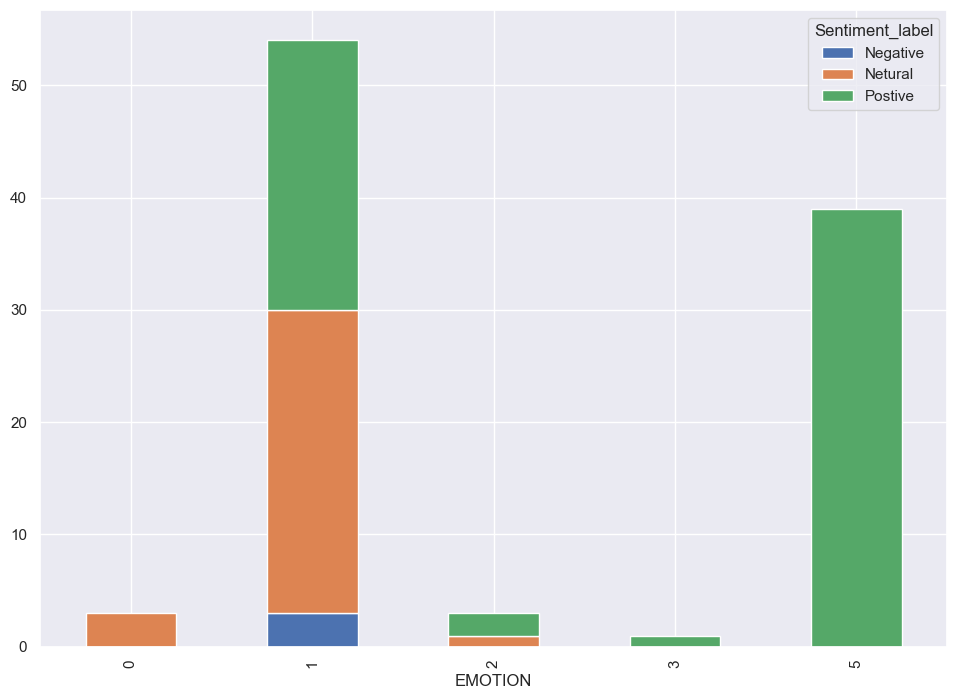

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure size using seaborn
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Generate the crosstab of EMOTION vs Sentiment_label
Result = pd.crosstab(twt.EMOTION, twt.Sentiment_label)

# Manually sort the columns before plotting (sort by column names)
Result = Result.sort_index(axis=1)

# Plotting the stacked bar chart
plt = Result.plot.bar(stacked=True)

# Add legend title
plt.legend(title='Sentiment_label')

# Save the figure as a PNG file
plt.figure.savefig('Emotion_Sentiment_stacked.png', dpi=400)